# Notebook para experimentar con representación de los datos del Minsal respecto al Covid19

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.ticker as ticker
import numpy as np
import calendar

#from matplotlib.ticker import NullFormatter  # useful for `logit` scale

### Se lee de archivo directamente de repositorio Git Hub que provee Jorge Perez Rojas (Muchas gracias !!!)

In [20]:


url_resumen_nacional = "https://raw.githubusercontent.com/jorgeperezrojas/covid19-data/master/csv/resumen_nacional.csv"

#data = pd.read_csv("../csv/resumen_nacional.csv")
data = pd.read_csv(url_resumen_nacional)

#data_pacientes_en_uci = pd.read_csv("../csv/pacientes_en_uci.csv")

### Se ve que la carga sea correcta

In [21]:
data

,dia,confirmados,muertes
0,03/07/2020,7,0
1,03/08/2020,9,0
2,03/09/2020,12,0
3,03/10/2020,17,0
4,03/11/2020,23,0
...,...,...,...
166,08/20/2020,391849,10671
167,08/21/2020,393769,10723
168,08/22/2020,395708,10792
169,08/23/2020,397665,10852


Se guarda el nro de lineas

In [22]:
#data.describe()
n = data["dia"].count()-1
n

170

## Se imprime un resumen del día

In [23]:

print("Total de Confirmados ", data["dia"][n], " = ", data["confirmados"][n] )
print("Total de Fallecidos al ", data["dia"][n], " = ", data["muertes"][n])

confirmados_ultimas_24h = data["confirmados"][n] - data["confirmados"][n-1]
print("Confirmados ultimas 24h = ", confirmados_ultimas_24h )

muertes_ultimas_24h = data["muertes"][n] - data["muertes"][n-1]
print("Fallecidos ultimas 24h = ", muertes_ultimas_24h )



Total de Confirmados  08/24/2020  =  399568
Total de Fallecidos al  08/24/2020  =  10916
Confirmados ultimas 24h =  1903
Fallecidos ultimas 24h =  64


### Se agregan 2 columnas mas a un nuevo dataset con las diferencias diarias de Confirmados y Fallecidos

In [24]:
#df_nro_confirmados_dia = pd.DataFrame(dict(nro_confirmados_dia = data["confirmados"][1] - data["confirmados"][0]))

d = []

for i in range(0,n+1):
    if (i==0):
        diff_confirmados = 0
        diff_muertes = 0
        d.append((diff_confirmados,diff_muertes))
    else:
        diff_confirmados = data["confirmados"][i] - data["confirmados"][i-1]
        diff_muertes = data["muertes"][i] - data["muertes"][i-1]
        d.append((diff_confirmados,diff_muertes))
    
    
df = pd.DataFrame(d, columns=("Confirmados_ult_24h", "Fallecidos_ult_24h"))
#   print(i, "\n")
data2 = pd.concat([data,df], axis=1)

data2
#nro_confirmados_dia

,dia,confirmados,muertes,Confirmados_ult_24h,Fallecidos_ult_24h
0,03/07/2020,7,0,0,0
1,03/08/2020,9,0,2,0
2,03/09/2020,12,0,3,0
3,03/10/2020,17,0,5,0
4,03/11/2020,23,0,6,0
...,...,...,...,...,...
166,08/20/2020,391849,10671,1812,93
167,08/21/2020,393769,10723,1920,52
168,08/22/2020,395708,10792,1939,69
169,08/23/2020,397665,10852,1957,60


In [25]:
data2.describe()

,confirmados,muertes,Confirmados_ult_24h,Fallecidos_ult_24h
count,171.000000,171.000000,171.000000,171.000000
mean,155933.023392,3545.210526,2336.614035,63.836257
std,150399.330501,3975.504026,3143.114919,108.593722
min,7.000000,0.000000,0.000000,0.000000
25%,9909.000000,129.500000,454.500000,7.000000
50%,99688.000000,1054.000000,1903.000000,38.000000
75%,316349.000000,7001.500000,3531.500000,80.500000
max,399568.000000,10916.000000,36179.000000,1057.000000


In [26]:
data=[]   ## Libero memoria


### Se grafican todas las columnas del nuevo dataset

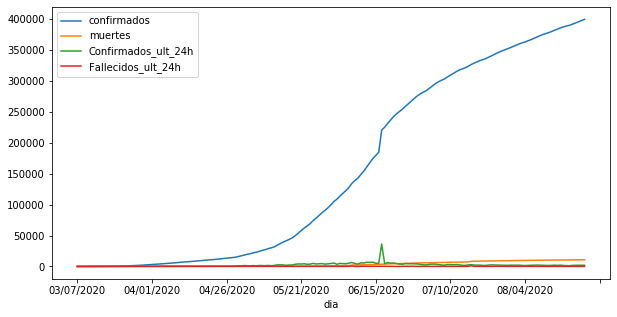

In [27]:
data2.plot(kind="line", x="dia" , figsize = (10,5), fontsize=10 )

In [28]:
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(6)+1]
#dias

np.arange(0, n, step=20)

array([  0,  20,  40,  60,  80, 100, 120, 140, 160])

## Para graficar los datos respecto a evolución de Casos Confirmados y de las Últimas 24 Horas

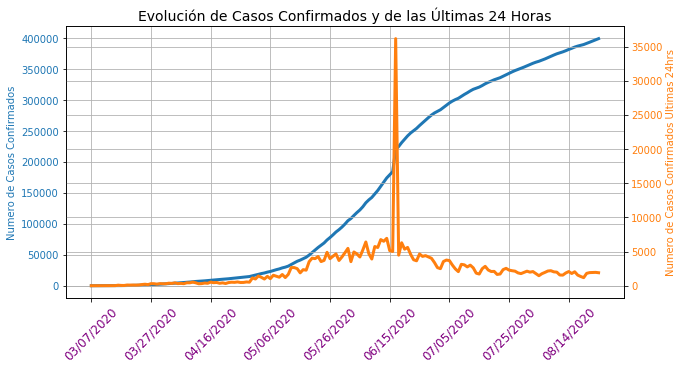

In [29]:
#data.plot(kind="line", x="dia" , y= ["confirmados", "muertes"], figsize = (10,5), fontsize=20 )
#plt.figure(figsize= [100000, 100000])


fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'

plt.title("Evolución de Casos Confirmados y de las Últimas 24 Horas", fontsize=14)
ax1.set_ylabel('Numero de Casos Confirmados', color=color)
ax1.plot(data2["confirmados"], color=color, linewidth=3, label="Hola")
plt.grid(True)
ax1.tick_params(axis='y', labelcolor=color)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]# Para generar el lugar del primer días de cada mes en un año
dias=np.arange(0, n+20, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80], data2["dia"][100], data2["dia"][120], data2["dia"][140], data2["dia"][160]]
plt.xticks( dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:orange'
#data2.plot(x="dia",y=["confirmados"], figsize=(10,10), linewidth=5 )

ax2.set_ylabel('Numero de Casos Confirmados Ultimas 24hrs', color=color)  # we already handled the x-label with ax1
#ax2.plot(data2["dia"], data2["Confirmados_ult_24h"], label="Conf_ult_24h", data2["Fallecidos_ult_24h"], label="Fallec._ult_24h")
ax2.plot(data2["Confirmados_ult_24h"], color=color, linewidth=3)
plt.grid(True)
ax2.tick_params(axis='y', labelcolor=color)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]  # Para generar el lugar del primer días de cada mes en un año
dias=np.arange(0, n+20, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80], data2["dia"][100], data2["dia"][120], data2["dia"][140], data2["dia"][160]]
#plt.xticks(dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione


#ig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()










## Para graficar los datos respecto a evolución de Casos de Fallecidos y de las Últimas 24 Horas

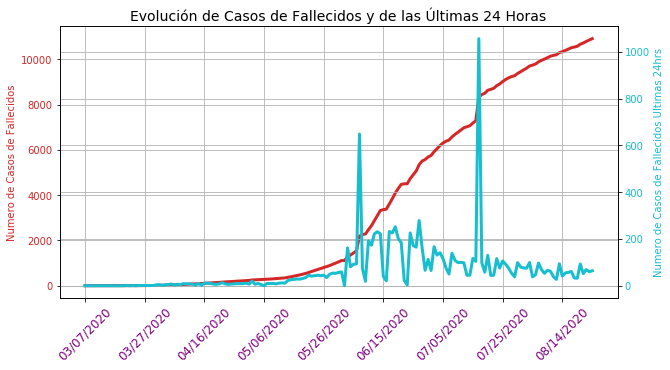

In [30]:
#data.plot(kind="line", x="dia" , y= ["confirmados", "muertes"], figsize = (10,5), fontsize=20 )
#plt.figure(figsize= [100000, 100000])

fig, ax3 = plt.subplots(figsize=(10, 5))

color = 'tab:red'

plt.title("Evolución de Casos de Fallecidos y de las Últimas 24 Horas", fontsize=14)
ax3.set_ylabel('Numero de Casos de Fallecidos', color=color)
ax3.plot(data2["muertes"], color=color, linewidth=3, label="Fallecidos")
plt.grid(True)
ax3.tick_params(axis='y', labelcolor=color)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]# Para generar el lugar del primer días de cada mes en un año
dias=np.arange(0, n+20, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80], data2["dia"][100], data2["dia"][120], data2["dia"][140], data2["dia"][160]]
plt.xticks( dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:cyan'
#data2.plot(x="dia",y=["confirmados"], figsize=(10,10), linewidth=5 )

ax4.set_ylabel('Numero de Casos de Fallecidos Ultimas 24hrs', color=color)  # we already handled the x-label with ax1
#ax2.plot(data2["dia"], data2["Confirmados_ult_24h"], label="Conf_ult_24h", data2["Fallecidos_ult_24h"], label="Fallec._ult_24h")
ax4.plot(data2["Fallecidos_ult_24h"], color=color, linewidth=3)
plt.grid(True)
ax4.tick_params(axis='y', labelcolor=color)
dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]  # Para generar el lugar del primer días de cada mes en un año
dias=np.arange(0, n+20, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80], data2["dia"][100], data2["dia"][120], data2["dia"][140], data2["dia"][160]]
#plt.xticks(dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()










## Se grafican las columnas en forma separada

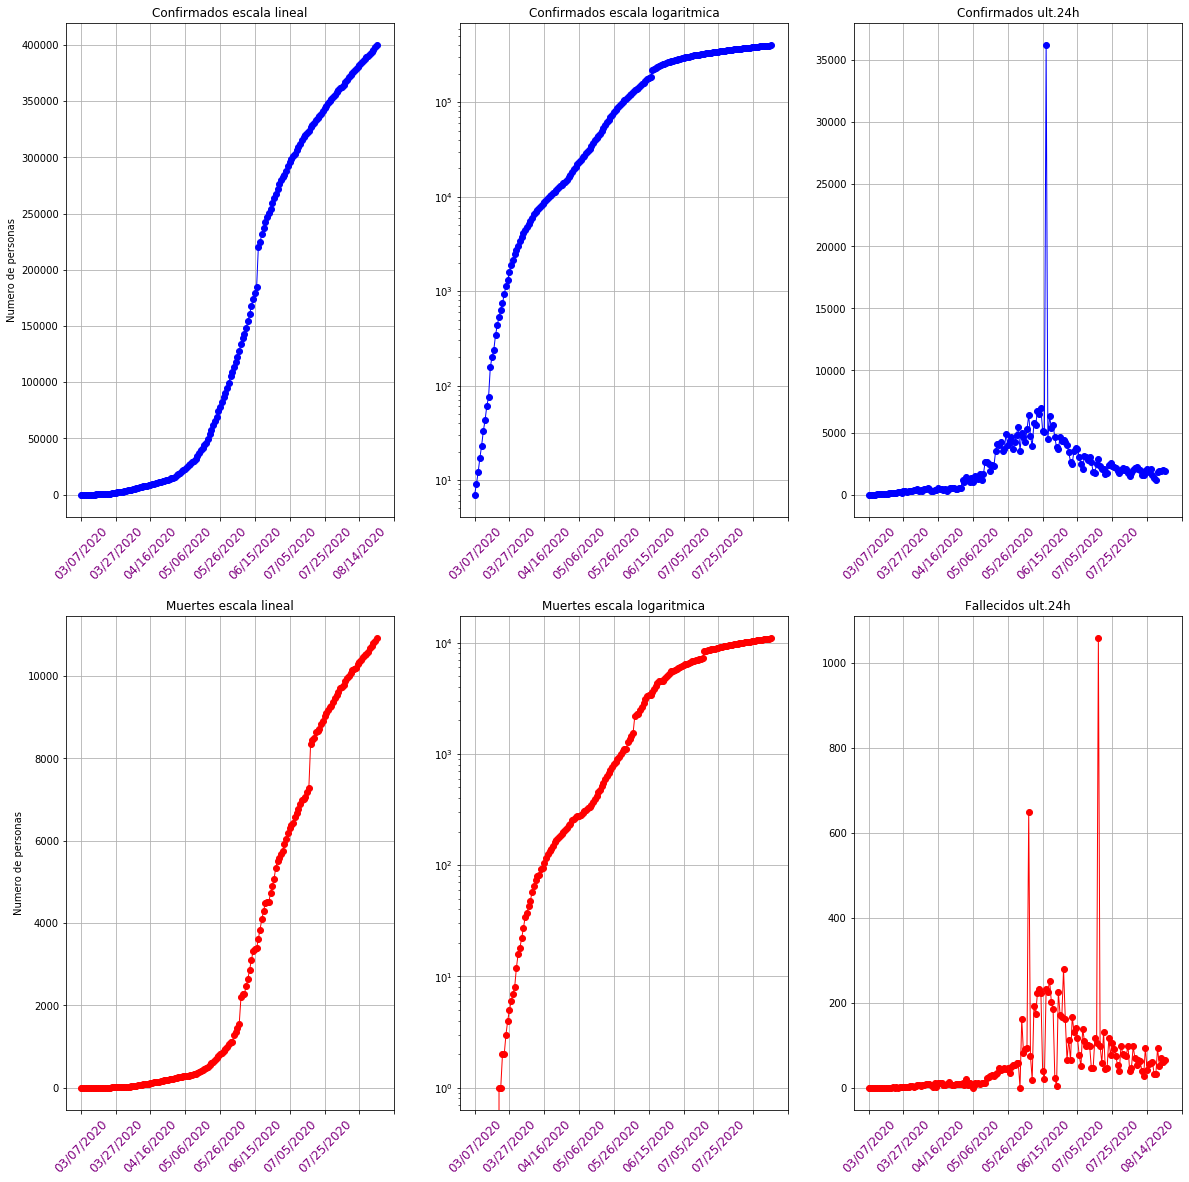

In [31]:
plt.figure(figsize= [20, 20])

#fig, ax = plt.subplots()

plt.subplot(231)
#data2.plot( x="dia", y="confirmados" )
plt.plot(data2["dia"], data2["confirmados"], 'bo-', linewidth=1)
plt.title('Confirmados escala lineal')
plt.grid(True)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]  # Para generar el lugar del primer días de cada mes en un año
dias=np.arange(0, n+20, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80], data2["dia"][100], data2["dia"][120], data2["dia"][140], data2["dia"][160]]
plt.xticks(dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione
#meses = ["Marzo", "Abril", "Mayo", "Junio"]
plt.xticks(dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione
plt.ylabel("Numero de personas")

#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(range(start, end, 10))

plt.subplot(232)
#data2.plot( x="dia", y="confirmados" )
plt.plot(data2["dia"], data2["confirmados"], 'bo-', linewidth=1)
plt.yscale('log')
plt.title('Confirmados escala logaritmica')
plt.grid(True)
#plt.xticks(rotation=90)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]  # Para generar el lugar del primer días de cada mes en un año
#meses = ["Marzo", "Abril", "Mayo", "Junio"]
dias=np.arange(0, n+20, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80], data2["dia"][100], data2["dia"][120], data2["dia"][140]]
plt.xticks(dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione


plt.subplot(233)
#data2.plot( x="dia", y="confirmados" )
plt.plot(data2["dia"], data2["Confirmados_ult_24h"], 'bo-', linewidth=1)
plt.title('Confirmados ult.24h')
plt.grid(True)
#plt.xticks(rotation=90)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]  # Para generar el lugar del primer días de cada mes en un año
#meses = ["Marzo", "Abril", "Mayo", "Junio"]
dias=np.arange(0, n+20, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80], data2["dia"][100], data2["dia"][120], data2["dia"][140]]
plt.xticks(dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione


plt.subplot(234)
#data2.plot( x="dia", y="muertes" )
plt.plot(data2["dia"], data2["muertes"], 'ro-', linewidth=1 )
plt.title('Muertes escala lineal')
plt.grid(True)
#plt.xticks(rotation=90)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]  # Para generar el lugar del primer días de cada mes en un año
#meses = ["Marzo", "Abril", "Mayo", "Junio"]
dias=np.arange(0, n+20, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80], data2["dia"][100], data2["dia"][120], data2["dia"][140]]
plt.xticks(dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione
plt.ylabel("Numero de personas")

plt.subplot(235)
#data2.plot( x="dia", y="muertes" )
plt.plot(data2["dia"], data2["muertes"], 'ro-', linewidth=1 )
plt.yscale('log')
plt.title('Muertes escala logaritmica')
plt.grid(True)
#plt.xticks(rotation=90)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]  # Para generar el lugar del primer días de cada mes en un año
#meses = ["Marzo", "Abril", "Mayo", "Junio"]
dias=np.arange(0, n+20, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80], data2["dia"][100], data2["dia"][120], data2["dia"][140]]
plt.xticks(dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione


plt.subplot(236)
#data2.plot( x="dia", y="confirmados" )
#plt.bar(data2["dia"], data2["Fallecidos_ult_24h"], color="red")
plt.plot(data2["dia"], data2["Fallecidos_ult_24h"], 'ro-', linewidth=1 )
plt.title('Fallecidos ult.24h')
plt.grid(True)
#plt.xticks(rotation=90)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]  # Para generar el lugar del primer días de cada mes en un año
#meses = ["Marzo", "Abril", "Mayo", "Junio"]
dias=np.arange(0, n+20, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80], data2["dia"][100], data2["dia"][120], data2["dia"][140], data2["dia"][160]]
plt.xticks(dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione


# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
#plt.gca().yaxis.set_minor_formatter(NullFormatter())

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
#plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)

plt.show()



## Resumen de uso de camas UCI

In [32]:
url_pacientes_en_uci = "https://raw.githubusercontent.com/jorgeperezrojas/covid19-data/master/csv/pacientes_en_uci.csv"
data3 = pd.read_csv(url_pacientes_en_uci)

In [33]:
data3

,codigo,region,04/01/2020,04/02/2020,04/03/2020,04/04/2020,04/05/2020,04/06/2020,04/07/2020,04/08/2020,...,08/14/2020,08/15/2020,08/16/2020,08/17/2020,08/18/2020,08/19/2020,08/20/2020,08/21/2020,08/22/2020,08/23/2020
0,15,Arica y Parinacota,0,0,0,0,2,4,4,5,...,28,29,28,25,24,24,21,20,20,18.0
1,1,Tarapacá,1,1,1,1,1,2,2,2,...,23,23,24,24,24,23,23,23,23,21.0
2,2,Antofagasta,3,4,3,3,3,3,2,2,...,67,72,70,73,77,74,67,70,71,68.0
3,3,Atacama,0,0,0,0,0,0,0,1,...,10,11,11,12,9,9,8,7,8,8.0
4,4,Coquimbo,1,1,1,2,1,1,2,1,...,44,46,43,43,40,42,39,42,36,39.0
5,5,Valparaíso,14,17,18,22,27,22,21,20,...,95,94,96,96,97,94,97,97,94,95.0
6,13,Metropolitana,83,90,107,129,146,161,160,174,...,792,741,723,708,693,669,649,631,610,582.0
7,6,O’Higgins,5,5,5,5,5,6,6,6,...,47,46,48,48,47,39,36,42,42,45.0
8,7,Maule,3,3,3,3,4,5,7,8,...,30,28,25,24,25,24,23,21,26,27.0
9,16,Ñuble,7,8,10,11,10,11,13,13,...,13,13,13,16,15,15,15,13,14,14.0


In [34]:
data3.describe()

,codigo,04/01/2020,04/02/2020,04/03/2020,04/04/2020,04/05/2020,04/06/2020,04/07/2020,04/08/2020,04/09/2020,...,08/14/2020,08/15/2020,08/16/2020,08/17/2020,08/18/2020,08/19/2020,08/20/2020,08/21/2020,08/22/2020,08/23/2020
count,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000
mean,8.500000,10.812500,12.500000,14.81250,17.500000,19.187500,20.43750,21.062500,22.625000,22.500000,...,78.250000,75.437500,74.375000,73.562500,72.312500,70.000000,67.312500,67.000000,66.125000,68.133333
std,4.760952,20.504369,22.238105,26.66638,32.184883,36.133491,39.55413,39.260614,42.835927,40.551202,...,192.354014,179.660038,175.344566,171.605349,168.121273,162.258641,157.576529,153.250557,147.914333,145.094485
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,4.750000,1.000000,1.000000,1.00000,1.750000,1.750000,2.75000,2.000000,2.000000,2.000000,...,9.000000,9.750000,10.000000,10.750000,8.500000,8.750000,7.750000,7.000000,8.000000,11.000000
50%,8.500000,4.000000,4.500000,4.00000,4.000000,4.500000,5.50000,6.500000,7.000000,8.500000,...,25.500000,25.500000,24.500000,24.000000,24.000000,23.500000,22.000000,20.500000,21.500000,21.000000
75%,12.250000,11.000000,13.250000,18.00000,22.000000,23.000000,22.25000,21.750000,21.250000,22.500000,...,52.000000,52.250000,53.500000,54.250000,54.250000,50.000000,46.000000,49.000000,49.250000,56.500000
max,16.000000,83.000000,90.000000,107.00000,129.000000,146.000000,161.00000,160.000000,174.000000,164.000000,...,792.000000,741.000000,723.000000,708.000000,693.000000,669.000000,649.000000,631.000000,610.000000,582.000000


## Solo Region Metropolitana

Text(0.5, 1.0, 'Evolución de uso de camas UCI Region Metropolitana desde el 07 de marzo al dia de hoy')

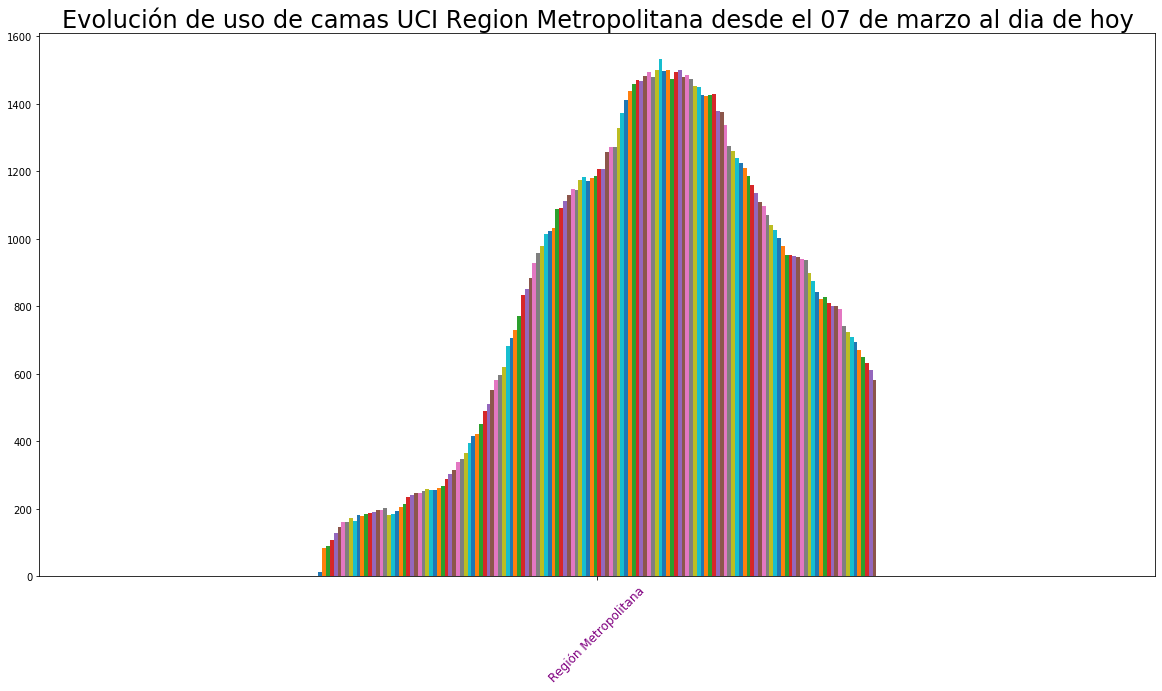

In [35]:

codigo_RM = []
codigo_RM.append(0)

nom_RM = []
nom_RM.append("Región Metropolitana")

data_RM = data3[data3["region"] == "Metropolitana"]
region_RM = data_RM

region_RM.plot(kind="bar", legend=False, figsize=(20, 10))
plt.xticks(codigo_RM , nom_RM , size = 'large', color = 'purple', rotation = 45)
plt.title("Evolución de uso de camas UCI Region Metropolitana desde el 07 de marzo al dia de hoy", fontsize=24)

## Todas las regiones menos la metropolitana

Text(0.5, 1.0, 'Evolución de uso de camas UCI Regiones desde el 07 de marzo al dia de hoy')

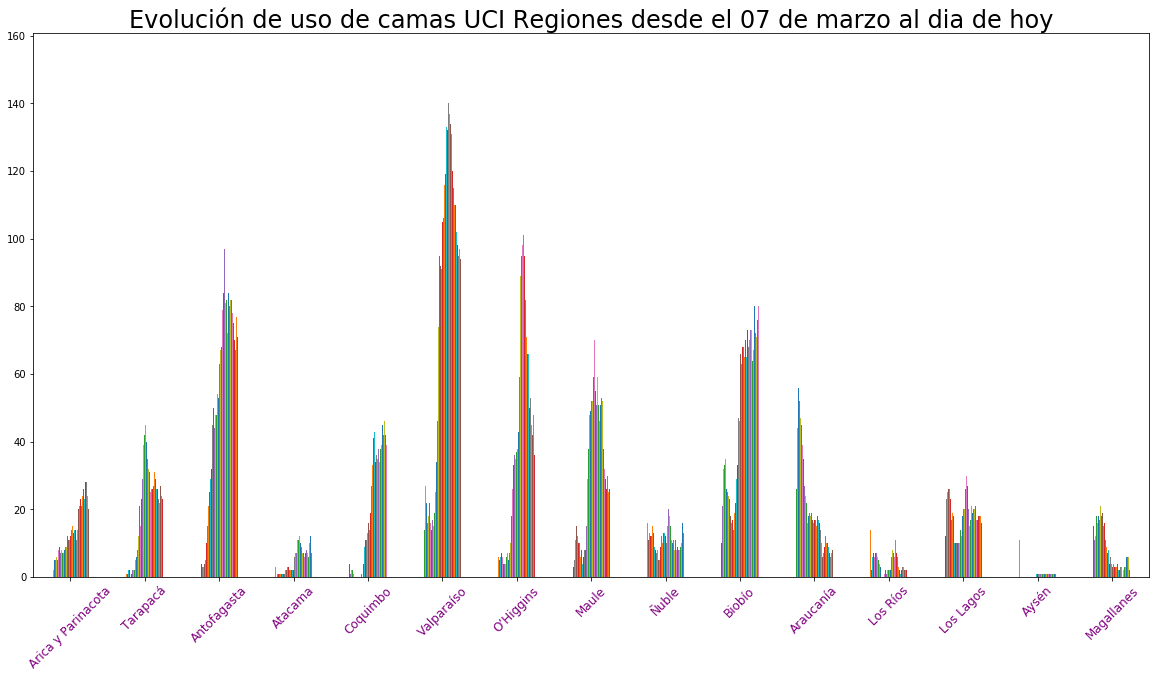

In [36]:
data_sin_RM = data3[data3["region"] != "Metropolitana"]


a = np.arange(0,15)

codigo_sin_RM = []
for i in a:
    codigo_sin_RM.append(i)

d = []

for i in range(0,6):
    d.append(data3["region"][i])

for j in range(7,16):
    d.append(data3["region"][j])
    
    
region_sin_RM = d


df_region_sin_RM = data_sin_RM
df_region_sin_RM = df_region_sin_RM.reset_index()


df_region_sin_RM.plot(kind="bar", legend=False, figsize=(20, 10))
plt.xticks(codigo_sin_RM , region_sin_RM , size = 'large', color = 'purple', rotation = 45)
plt.title("Evolución de uso de camas UCI Regiones desde el 07 de marzo al dia de hoy", fontsize=24)
